In [6]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Idea: Subscribers are more likely than non-subscribers (users) to use Citibikes Monday through Friday.

## Null Hypothesis: Non-subscribers (users) use Citibikes as much or more than subscribers Monday through Friday.

## Alternative Hypothsesis: Non-subscribers use Citibike less than subscribers Monday through Friday.

#### Significance Level $\\alpha=0.05$

In [7]:
import zipfile

datestring = '201502'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df['date'] = pd.to_datetime(df['starttime'])
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  10.7M      0 --:--:-- --:--:-- --:--:-- 16.1M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [8]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [17]:
data_reduct = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14]], axis =1)
data_reduct.head(79)

,usertype,date
0,Subscriber,2015-02-01 00:00:00
1,Subscriber,2015-02-01 00:00:00
2,Subscriber,2015-02-01 00:01:00
3,Subscriber,2015-02-01 00:01:00
4,Subscriber,2015-02-01 00:01:00
5,Subscriber,2015-02-01 00:02:00
6,Subscriber,2015-02-01 00:04:00
7,Subscriber,2015-02-01 00:04:00
8,Subscriber,2015-02-01 00:04:00
9,Subscriber,2015-02-01 00:05:00


In [18]:
df['usertype'] = df['usertype'].replace(['Subscriber','Customer'],[1,2])

In [23]:
data_reduct = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14]], axis =1)
data_reduct.head(79)

,usertype,date
0,1,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,1,2015-02-01 00:01:00
3,1,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00
5,1,2015-02-01 00:02:00
6,1,2015-02-01 00:04:00
7,1,2015-02-01 00:04:00
8,1,2015-02-01 00:04:00
9,1,2015-02-01 00:05:00


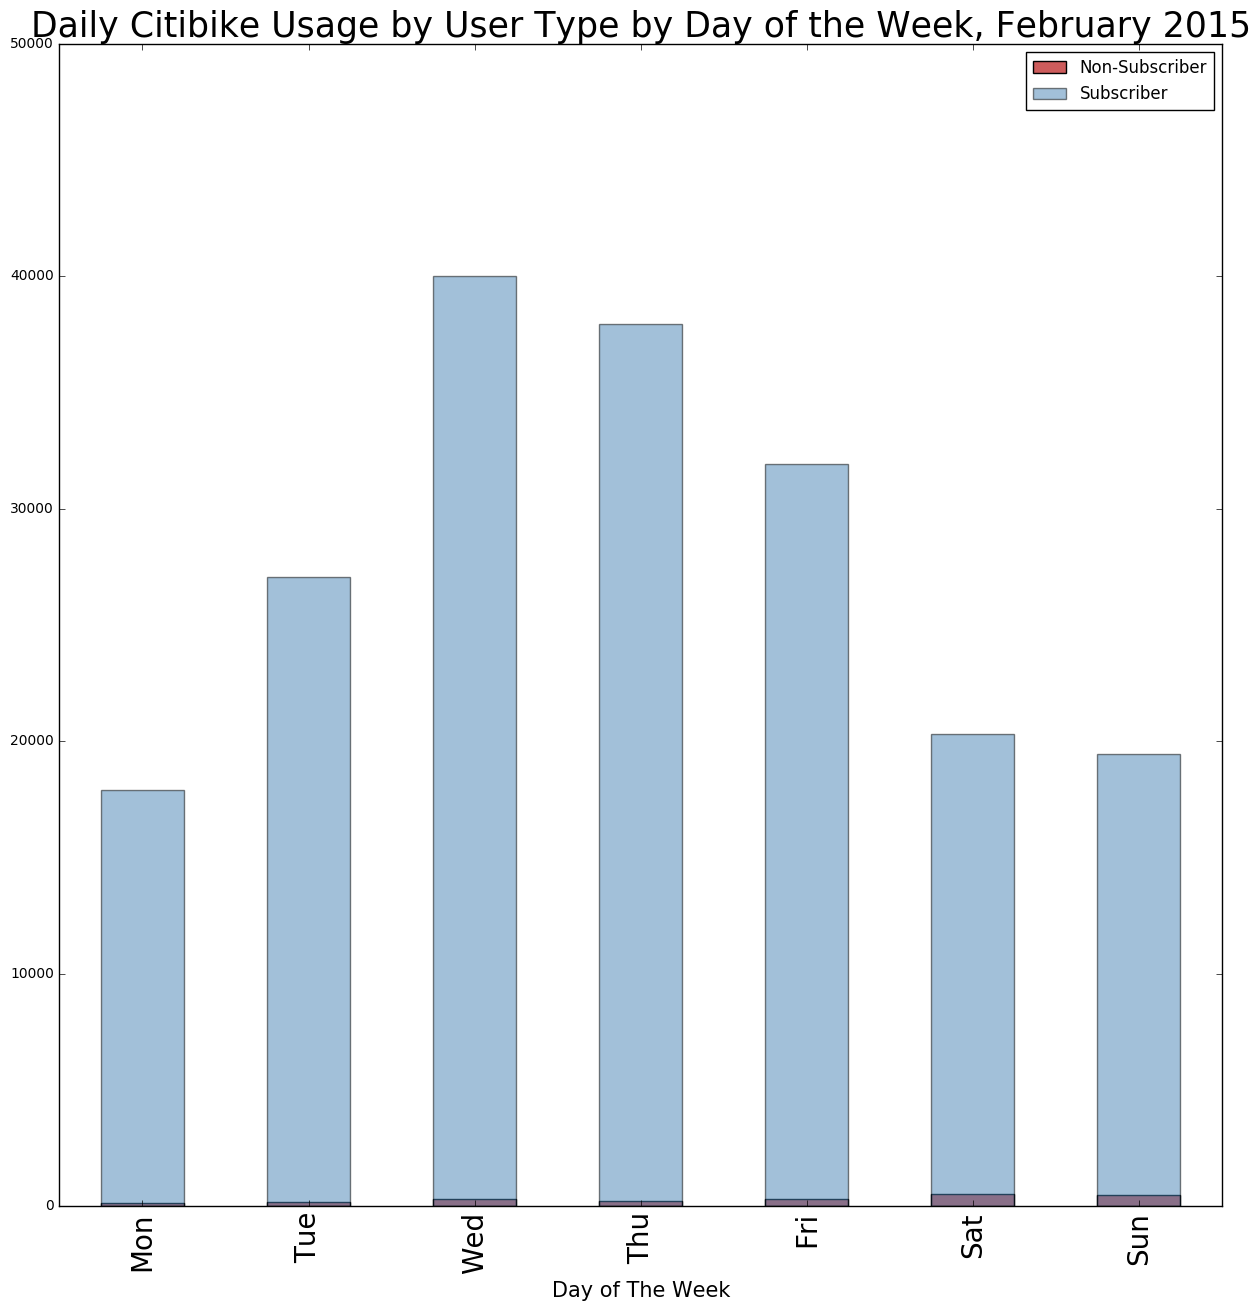

In [28]:
fig = pl.figure(figsize(15,15))

norm_w = 1
((df['date'][df['usertype'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Non-Subscriber')

norm_m = 1
ax = ((df['date'][df['usertype'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylim([0,50000])
pl.xlabel('Day of The Week',fontsize=15)
pl.title("Daily Citibike Usage by User Type by Day of the Week, February 2015", fontsize=25)
pl.legend()

# Daily Citibike Usage by User Type by Day of the Week, February 2015